In [211]:
# Install python packages and import libraries
# !pip install pandas
import pandas as pd
from scipy import stats
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

### A. Logistic regression 

Meter A contains 87 instances of diagnostic parameters for a liquid ultrasonic flow meter, having 37 attributes and two classes/health states (0 - healthy, 1 - installation effects). Create a logistic regression model that is able to predict if observations in your test set are healthy or were there any installation effects.


In [212]:
#read data

df=pd.read_csv('MeterA.csv', sep='\t') 
df.head(5)
df['26']

df['class']=df['class'].replace(1, 0)
df['class']=df['class'].replace(2, 1)
df

,Flatness_ratio,Symmetry,Crossflow,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,class
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,0
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,0
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,0
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,0
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,...,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,1
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,...,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,1
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,...,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,1
85,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,...,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067,1


####  Minimize column by folowing dataset guideline: I have made average of similar column to reduce it. I did check the result with or without any modication of dataset. Both reulst were (72.2 % and 77.7% without modification), however, without any column reduction by avraging similar column might be not a good idea since it reduce  accuracy 5%. I have shown without any conversion of data result at end.

Meter A

(1) -- Flatness ratio

(2) -- Symmetry

(3) -- Crossflow

(4)-(11) -- Flow velocity in each of the eight paths

(12)-(19) -- Speed of sound in each of the eight paths

(20) -- Average speed of sound in all eight paths

(21)-(36) -- Gain at both ends of each of the eight paths

(37) -- Class attribute or health state of meter: 0,1

0 healty, 1 installation effects


In [198]:
df['Flow_velocity'] = df[['4','5','6','7','8','9','10','11']].mean(axis=1)
df['Speed_of_sound'] = df[['12','13','14','15','16','17','18','19']].mean(axis=1)
df['Speed_of_sound'] = df[['12','13','14','15','16','17','18','19']].mean(axis=1)
df['Gain'] = df[['21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36']].mean(axis=1)
 

df=df.drop(['4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36'],axis=1)
df

,Flatness_ratio,Symmetry,Crossflow,avg_speed,class,Flow_velocity,Speed_of_sound,Gain
0,0.841499,1.009367,0.993816,1485.391229,0,9.350917,1485.391229,35.064189
1,0.842250,1.006584,0.996605,1485.919896,0,8.323063,1485.919896,34.975281
2,0.840723,1.011647,0.998152,1485.903146,0,7.273721,1485.903146,34.920553
3,0.841119,1.017807,0.996812,1484.790938,0,6.214215,1484.790937,34.878133
4,0.840358,1.016534,0.996221,1484.252875,0,6.209143,1484.252875,34.882507
...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,1484.645292,1,3.050531,1484.645291,34.725749
83,0.792309,1.004472,0.999873,1484.581813,1,3.053593,1484.581813,34.726258
84,0.793471,1.009560,1.001110,1484.530583,1,3.049676,1484.530583,34.729004
85,0.796730,1.010570,0.999029,1484.473917,1,3.053826,1484.473917,34.728801



##### 1. Dividte dataset into training and test sample, random split 80% train 20% test

In [213]:

X = df.drop('class',axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

print('lenth of test data:',len(y_test))
print('lenth of train data:',len(X_train))

lenth of test data: 18
lenth of train data: 69


In [172]:
y_test

76    1
0     0
26    0
22    0
12    0
67    1
10    0
18    0
4     0
68    1
84    1
65    1
53    1
80    1
83    1
64    1
33    0
79    1
Name: class, dtype: int64

In [200]:
X_test

,Flatness_ratio,Symmetry,Crossflow,avg_speed,Flow_velocity,Speed_of_sound,Gain
76,0.800252,1.005464,0.997055,1485.043688,6.117122,1485.043687,34.820150
0,0.841499,1.009367,0.993816,1485.391229,9.350917,1485.391229,35.064189
26,0.835883,1.006690,0.998154,1483.892313,5.160622,1483.892313,34.840902
22,0.834697,1.010934,0.993565,1485.703021,6.195240,1485.703021,34.864401
12,0.833182,1.016012,0.998097,1484.282521,3.133298,1484.282521,34.777222
67,0.834050,1.019825,1.001583,1484.511438,2.089232,1484.511438,34.760538
10,0.838166,1.020302,0.998545,1484.189271,4.178860,1484.189271,34.806011
18,0.837927,1.005684,0.995000,1487.591604,8.279792,1487.591604,34.953411
4,0.840358,1.016534,0.996221,1484.252875,6.209143,1484.252875,34.882507
68,0.798122,0.997058,0.996450,1487.266104,9.145977,1487.266104,34.960632


#### Function creation for cross validation and Linear Regression

In [201]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)


# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False)


In [202]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6
0,0.023153,-0.802088,0.186921,0.160295,-0.531731,-0.112900,-3.450257e-09
1,-0.347714,-0.387639,0.118446,-0.729764,0.413648,-0.105555,7.405613e-08
2,-0.329914,0.011439,0.717298,0.484890,0.374311,-0.035808,7.066128e-09
3,0.436690,0.133648,0.447713,-0.276675,-0.115592,0.032901,-7.071068e-01
4,0.464626,-0.149011,-0.145543,0.169525,0.402421,-0.741656,-1.125044e-08


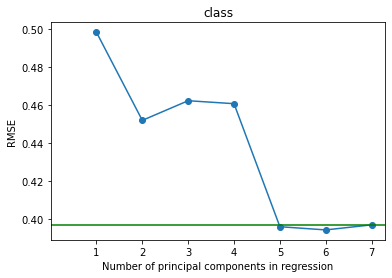

In [203]:
# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('class')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

# Logistic  regression model setup

#### we can see all 7 components or columns are important here, so next, we have to consider all columns in the logistic regression model and train the model. After that, we have calculated the accuracy and results shown  in heat map as well. Accuracy was 72.2%. Test data was 18 which was 20% of total data. We did randomly splited 80% train and 20% test data.

In [208]:
# Lets sets 


for i in range(7):
    best_pc_num = i+1

    # Train model with first  principal components
    lin_reg_pc = LogisticRegression().fit(X_train_pc[:,:best_pc_num], y_train)

    # Get cross-validation RMSE (train set)
    pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                           X_train_pc[:,:best_pc_num], 
                                           y_train, 
                                           cv=cv, 
                                           scoring='neg_root_mean_squared_error').mean()

    # Train model on training set
    lin_reg_pc = LogisticRegression().fit(X_train_pc[:,:best_pc_num], y_train)
    X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

    # Predict on test data
    preds = lin_reg_pc.predict(X_test_pc)
    pcr_score_test = mean_squared_error(y_test, preds, squared=False)

#     print('mean_squared_error','with PC number',i+1,':', pcr_score_test)
    
# print(preds)

pred=[]
for i in preds:
    if i <= .5:
        pred.append(0)
    else:
        pred.append(1)


print('accuracy:', accuracy_score(y_test, pred))

accuracy: 0.7222222222222222


In [209]:
OriginalVsPredictedlabel = pd.DataFrame({'Original class':y_test, 'predicted class': pred})
OriginalVsPredictedlabel


,Original class,predicted class
76,1,1
0,0,1
26,0,1
22,0,0
12,0,0
67,1,0
10,0,0
18,0,0
4,0,0
68,1,1


#### Here we can see that accuracy is 72.2 % where  class 0 (healthy) has been successfully predicted 6 out of 9; other hand,  class 1 (installation effects) has predicted accurately which 7 out of 9. Therefore, form this  logistic regression model is able to predict 72.2 % accurately whether our  test set are healthy or  there any installation effects. Since our train data is very small therefore 72% accuracy score  I think very good compared to its small size. 



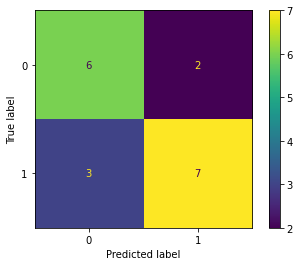

In [210]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Without any data modification score

In [217]:
#read data
df=pd.read_csv('MeterA.csv', sep='\t') 
df.head(5)

,Flatness_ratio,Symmetry,Crossflow,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,class
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1


In [218]:
df['class']=df['class'].replace(1, 0)
df['class']=df['class'].replace(2, 1)

# split data
X = df.drop('class',axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

print('lenth of test data:',len(y_test))
print('lenth of train data:',len(X_train))

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
pred=clf.predict(X_test_scaled)

print('accuracy:', accuracy_score(y_test, pred))

OriginalVsPredictedlabel = pd.DataFrame({'Original label':y_test, 'predicted label': pred})
OriginalVsPredictedlabel

lenth of test data: 18
lenth of train data: 69
accuracy: 0.7777777777777778


,Original label,predicted label
76,1,1
0,0,0
26,0,1
22,0,0
12,0,0
67,1,0
10,0,0
18,0,0
4,0,1
68,1,1


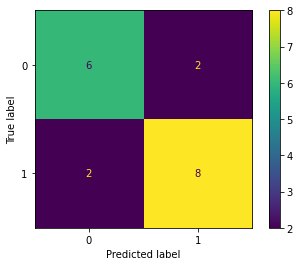

In [219]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### Here we can see without any  modification of data as I did previously by averaging similar type of cloumn,   that accuracy is 77.7 % where  class 0 (healthy) has been successfully predicted 6 out of 8; other hand,  class 1 (installation effects) has predicted accurately which 8 out of 10. 